In [111]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [89]:
df_census = pd.read_csv('census_lf_2011.csv')

In [90]:
df_geo_code = pd.read_csv('Geo_starting_row_CSV.csv')

In [91]:
df_census.head()

,Geography,Labour force st,Total - Age groups,15 to 24 years,15 to 19 years,20 to 24 years,25 to 64 years,25 to 44 years,45 to 64 years,65 years and over
0,1,Total - Labour force status,27259525.0,4324070.0,2160275.0,2163795.0,18383920.0,8755380.0,9628540.0,4551535.0
1,1,In the labour force,17990080.0,2613555.0,938185.0,1675365.0,14761045.0,7541800.0,7219240.0,615490.0
2,1,Employed,16595030.0,2180880.0,752530.0,1428350.0,13842115.0,7042700.0,6799415.0,572040.0
3,1,Unemployed,1395050.0,432670.0,185660.0,247015.0,918930.0,499105.0,419825.0,43445.0
4,1,Not in the labour force,9269445.0,1710515.0,1222085.0,488430.0,3622875.0,1213585.0,2409300.0,3936050.0


In [92]:
df_census.shape

(29968, 10)

In [93]:
df_geo_code.head()

,Geo Code,Geo Name,Line Number
0,1,Canada,2
1,10,Newfoundland and Labrador,2648
2,1001,Division No. 1,5294
3,1001105,Portugal Cove South,7940
4,1001113,Trepassey,10586


In [94]:
#Number of unique geo codes in census data
df_census['Geography'].nunique()

3746

In [95]:
df_geo_code[df_geo_code['Geo Name']=='Kitimat']

,Geo Code,Geo Name,Line Number
4669,5949005,Kitimat,12354176


In [96]:
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29968 entries, 0 to 29967
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Geography            29968 non-null  int64  
 1   Labour force st      29968 non-null  object 
 2   Total - Age groups   29968 non-null  float64
 3     15 to 24 years     29968 non-null  float64
 4       15 to 19 years   29968 non-null  float64
 5       20 to 24 years   29968 non-null  float64
 6     25 to 64 years     29968 non-null  float64
 7       25 to 44 years   29968 non-null  float64
 8       45 to 64 years   29968 non-null  float64
 9     65 years and over  29968 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 2.3+ MB


In [97]:
#Filter census data
df_census_unemp = df_census[df_census['Labour force st'].str.strip()=='Unemployed']

In [ ]:
df_census_unemp.columns = df_census_unemp.columns.str.strip()
df_census_unemp['Labour force st'] = df_census_unemp['Labour force st'].str.strip()

In [98]:
df_census_unemp.shape

(3746, 10)

In [99]:
df_census_unemp.head()

,Geography,Labour force st,Total - Age groups,15 to 24 years,15 to 19 years,20 to 24 years,25 to 64 years,25 to 44 years,45 to 64 years,65 years and over
3,1,Unemployed,1395050.0,432670.0,185660.0,247015.0,918930.0,499105.0,419825.0,43445.0
11,10,Unemployed,37265.0,7280.0,2385.0,4890.0,28935.0,13550.0,15385.0,1055.0
19,1001,Unemployed,13520.0,3510.0,1185.0,2325.0,9655.0,5345.0,4315.0,350.0
27,1001101,Unemployed,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35,1001105,Unemployed,45.0,0.0,0.0,0.0,30.0,0.0,30.0,0.0


In [124]:
df_census_num = []
for i in df_census_unemp.columns:
    if (df_census_unemp[i].dtype != 'O'):
        df_census_num.append(i)

In [125]:
df_census_num

['Geography',
 'Total - Age groups',
 '15 to 24 years',
 '15 to 19 years',
 '20 to 24 years',
 '25 to 64 years',
 '25 to 44 years',
 '45 to 64 years',
 '65 years and over']

Distribution of numerical data


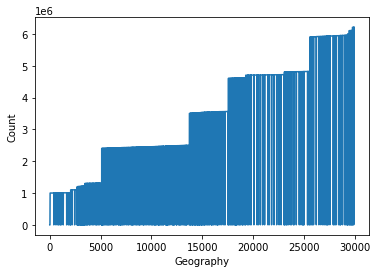

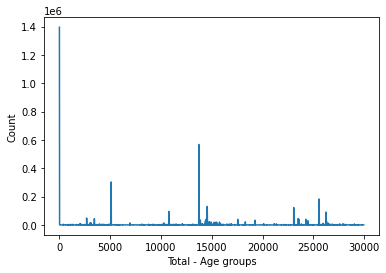

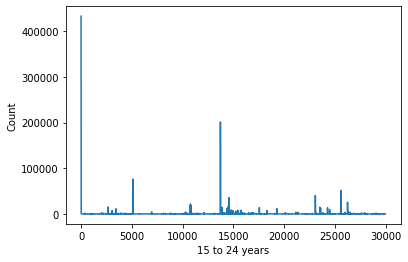

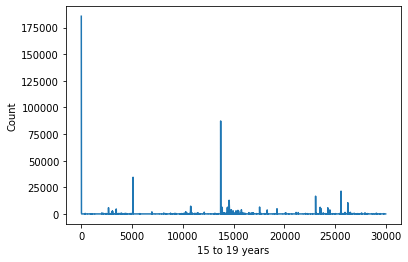

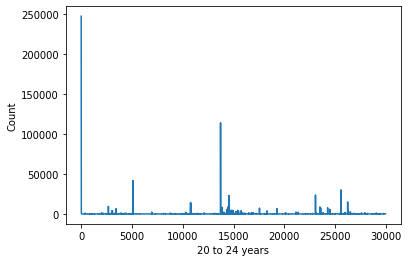

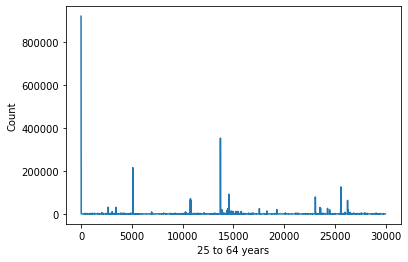

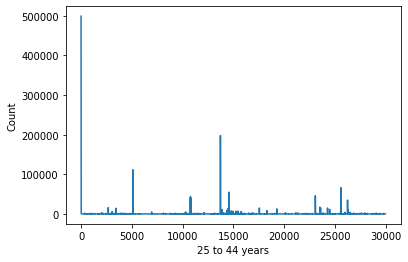

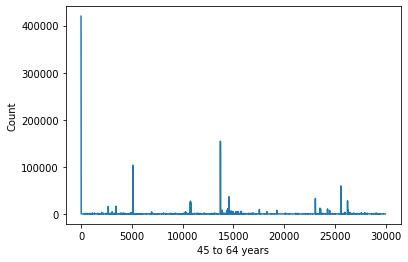

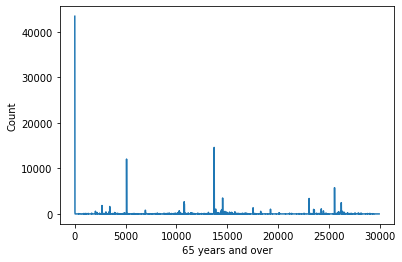

In [127]:
print("Distribution of numerical data")
for i in df_census_num:    
    plt.xlabel(f'{i}')
    plt.ylabel('Count')
    df_census_unemp[i].plot()
    plt.show()

In [101]:
#Without Transformation

In [104]:
df_census_unemp.head()

,Geography,Labour force st,Total - Age groups,15 to 24 years,15 to 19 years,20 to 24 years,25 to 64 years,25 to 44 years,45 to 64 years,65 years and over
3,1,Unemployed,1395050.0,432670.0,185660.0,247015.0,918930.0,499105.0,419825.0,43445.0
11,10,Unemployed,37265.0,7280.0,2385.0,4890.0,28935.0,13550.0,15385.0,1055.0
19,1001,Unemployed,13520.0,3510.0,1185.0,2325.0,9655.0,5345.0,4315.0,350.0
27,1001101,Unemployed,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35,1001105,Unemployed,45.0,0.0,0.0,0.0,30.0,0.0,30.0,0.0


In [108]:
X = df_census_unemp[['Geography', '15 to 24 years', '15 to 19 years', '20 to 24 years', '25 to 64 years', '25 to 44 years', '45 to 64 years', '65 years and over']]
y = df_census_unemp['Total - Age groups']

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [114]:
reg = LinearRegression().fit(X, y)

In [115]:
y_predict = reg.predict(X_test)

In [116]:
 reg.coef_

array([-2.14592498e-07,  9.48650960e-01,  5.24727329e-02,  4.99290714e-02,
        1.02733858e+00, -2.74916895e-02, -2.55936292e-02,  9.87896578e-01])

In [117]:
reg.intercept_

5.181511984180588